In [72]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [73]:
!pip install --upgrade scikit-learn mlxtend

In [74]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [76]:
model = sel.fit(df.iloc[:,:4],df['species'])

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


In [77]:
model.best_score_

0.9733333333333334

In [78]:
model.best_feature_names_

('sepal_width', 'petal_length', 'petal_width')

In [79]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [80]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


In [81]:
model.get_metric_dict()

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',),
  'ci_bound': 0.06961168520972599,
  'std_dev': 0.054160256030906434,
  'std_err': 0.027080128015453217},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',),
  'ci_bound': 0.04996313010354542,
  'std_dev': 0.038873012632301994,
  'std_err': 0.019436506316150997},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',),
  'ci_bound': 0.051411636732294784,
  'std_dev': 0.039999999999999994,
  'std_err': 0.019999999999999997},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  

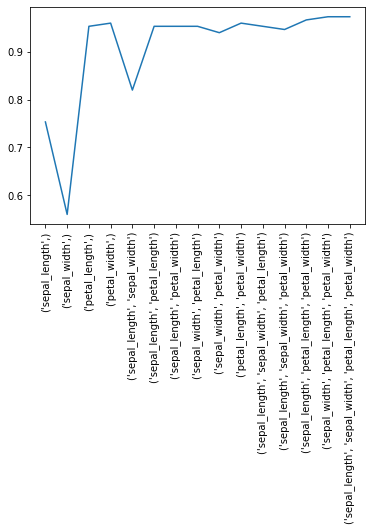

In [82]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

Regression Example

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

In [86]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [87]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [94]:
#worked by removing n_jobs parameter
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)


Features: 3000/8191IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Features: 8191/8191

In [96]:
sel.best_score_

0.6827988156800064

In [98]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [100]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919154, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182754, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549378, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675012, 0.03113193162308714, 0.0...",0.17746,"(4,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861513, 0.5762263847142655, 0.435...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752512, 0.5384374917854682, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072394, 0.545400615097599, 0.4449...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451422, 0.5448662375728612, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472


In [102]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [104]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [106]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291967, 0.5742220049707858, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532,404,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.8717831363927702, 0.5819307800982592, 0.462...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756,404,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985804, 0.5752245789381281, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116,404,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119793, 0.538138251576179, 0.4610...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434,404,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726772, 0.5751761822045904, 0.434...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568,404,11,0.67196
...,...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760348, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387,404,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917,404,1,0.066396
49,"(3, 7)","[-0.0371219722713414, -0.1671760395427997, 0.0...",0.057453,"(3, 7)",0.09446,0.127183,0.042394,404,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986,404,1,0.036424


In [108]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [110]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))  

training 0.710032783921856
testing 0.7205819296124483


#Sequential Backward Elimination

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)



(404, 13)


In [132]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155404


In [138]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [140]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [142]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817177, 0.692023850913878, 0.6822...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,404,13,0.692596
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710696, 0.6944570477695305, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,404,12,0.696781
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7547108925568492, 0.6959627893665097, 0.701...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,404,11,0.699918
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711023, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,404,9,0.69757
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800459, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,404,8,0.691605
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750725, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,404,7,0.686794
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497092, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,404,6,0.681258
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504308, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,404,5,0.677058
4,"(5, 7, 10, 12)","[0.7384743962575442, 0.6401188507668831, 0.587...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,404,4,0.659161


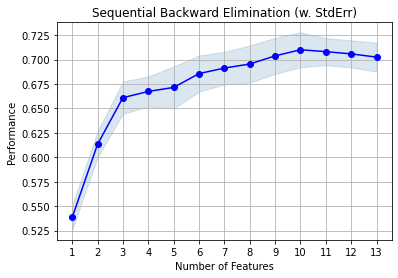

In [128]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()

In [144]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


#Forward Selection

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)



(404, 13)


In [148]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [150]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [152]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [154]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train, y_train)